# Select Dataset

* Combined Cycle Power Plant: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant
* The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

In [80]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
combined_cycle_power_plant = fetch_ucirepo(id=294) 
  
# data (as pandas dataframes) 
X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets 
  
# metadata 
print(combined_cycle_power_plant.metadata) 
  
# variable information 
print(combined_cycle_power_plant.variables) 

{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'authors': 'Pınar Tüfekci', 'publ

In [83]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate features (X) and target (y) into a DataFrame
df = pd.concat([X, y], axis=1)
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [92]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [97]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['PE']))  # Exclude the target variable
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(columns=['PE']).columns)

# Concatenate scaled features and target
final_df = pd.concat([scaled_df, df['PE']], axis=1)

print(final_df)

            AT         V        AP        RH      PE
0    -0.629519 -0.987297  1.820488 -0.009519  463.26
1     0.741909  0.681045  1.141863 -0.974621  444.37
2    -1.951297 -1.173018 -0.185078  1.289840  488.56
3     0.162205  0.237203 -0.508393  0.228160  446.48
4    -1.185069 -1.322539 -0.678470  1.596699  473.90
...        ...       ...       ...       ...     ...
9563 -0.402737 -0.363242  0.126450  1.211755  460.03
9564 -0.867037 -1.190331  1.753131 -0.447205  469.62
9565  1.565840  1.575811 -0.057099 -2.522618  429.57
9566  0.647976  1.191778  0.101191 -0.747901  435.74
9567  0.261507  0.646419  0.668677 -0.372545  453.28

[9568 rows x 5 columns]


In [99]:
final_df.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9568.000000
mean,-1.845421e-16,-1.927110e-16,5.472211e-15,-3.375227e-16,454.365009
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,17.066995
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00,420.260000
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01,439.750000
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01,451.550000
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01,468.430000
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00,495.760000


## Correlation Analysis

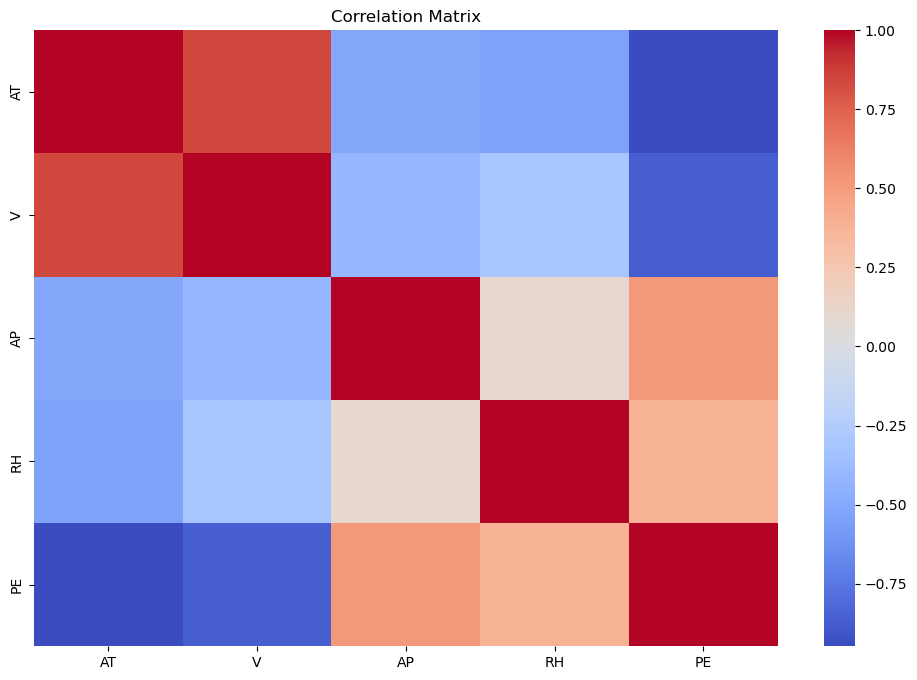

In [117]:
# Calculate correlation matrix
corr_matrix = final_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [139]:
# Focus on correlations with the target variable 'PE'
target_corr = corr_matrix['PE'].sort_values(ascending=False)
print(target_corr)

# Determine strong correlations (absolute value > 0.5)
strong_corrs = target_corr[abs(target_corr) > 0.5]
print("Strong Correlations with 'PE':")
print(strong_corrs)

PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64
Strong Correlations with 'PE':
PE    1.000000
AP    0.518429
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64


* `RH` has a weak correlation with `PE`.
* `AP`, `V` and `AT` shows a strong correlation with `PE`.

## Visualize Data

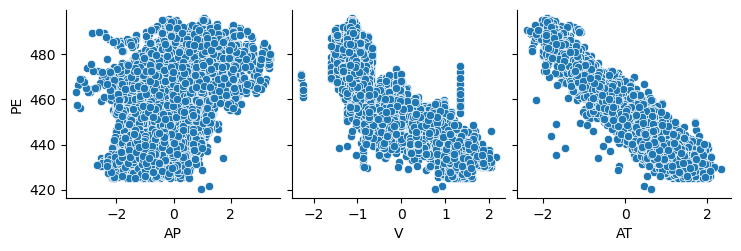

In [178]:
# Select features with strong correlations to PE
selected_features = ['AP', 'V', 'AT']

# Scatter plots
sns.pairplot(final_df, x_vars=selected_features, y_vars=['PE'], kind='scatter')
plt.show()

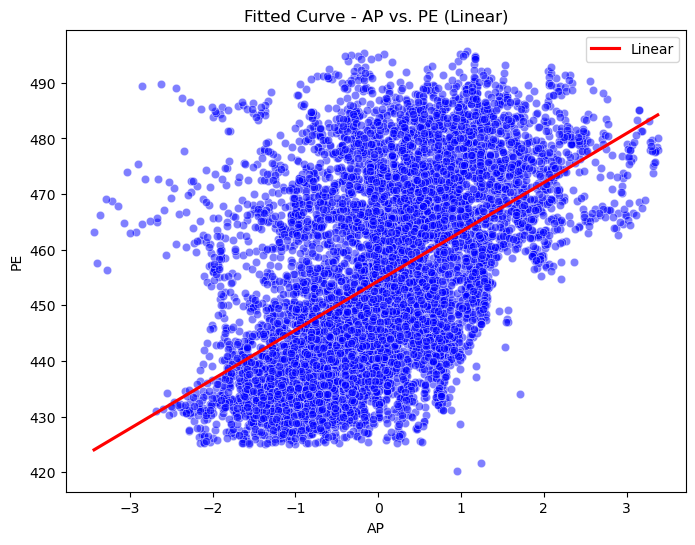

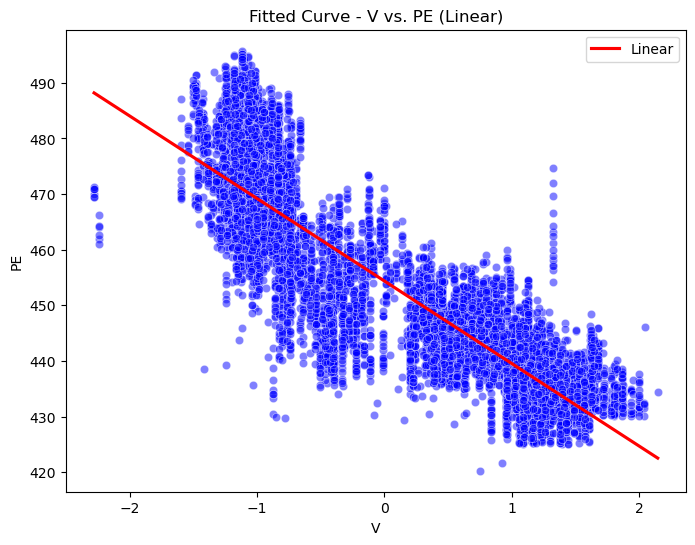

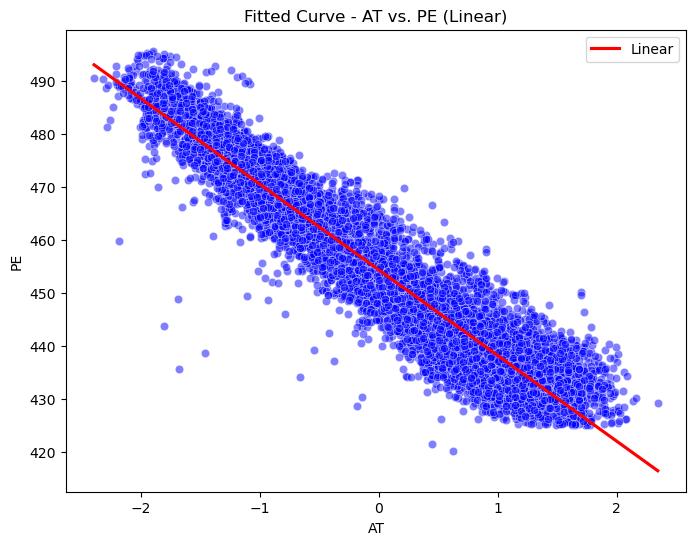

In [172]:
from sklearn.linear_model import LinearRegression

# Fitted curves - Simple Linear Regression
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=final_df[feature], y=final_df['PE'], color='blue', alpha=0.5)
    sns.regplot(x=final_df[feature], y=final_df['PE'], scatter=False, color='red', order=1, ci=None, label='Linear')
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.legend()
    plt.title(f'Fitted Curve - {feature} vs. PE (Linear)')
    plt.show()

# Regression Analysis

## Prepare the Dataset for Modeling

In [176]:
from sklearn.model_selection import train_test_split

# Create feature matrix (X) and target vector (y)
X = final_df[selected_features]
y = final_df['PE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Train Regression Models
* For experimental purposes, Ridge Regression, and Lasso Regression are included.
* Linear Regression serves as a good baseline to compare more complex models against.

In [212]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Train models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

## Evaluate and Compare Models

In [219]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, r2

# Linear Regression
rmse_linear, mae_linear, mape_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print("Linear Regression:")
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)
print("MAPE:", mape_linear)
print("R²:", r2_linear)

# Ridge Regression
rmse_ridge, mae_ridge, mape_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
print("\nRidge Regression:")
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)
print("MAPE:", mape_ridge)
print("R²:", r2_ridge)

# Lasso Regression
rmse_lasso, mae_lasso, mape_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
print("\nLasso Regression:")
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)
print("MAPE:", mape_lasso)
print("R²:", r2_lasso)

Linear Regression:
RMSE: 4.914045960560798
MAE: 3.8705291923743865
MAPE: 0.8535324531183879
R²: 0.9176290179282053

Ridge Regression:
RMSE: 4.913882592425947
MAE: 3.870478689984384
MAPE: 0.8535150818770315
R²: 0.9176344947064562

Lasso Regression:
RMSE: 4.914948620209852
MAE: 3.873916355994897
MAPE: 0.8541780560501538
R²: 0.9175987537461838
